In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [40]:
crop = pd.read_csv('crop_recommendation.csv')

In [41]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [42]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [43]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [44]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [45]:
crop.size

17600

In [46]:
crop.shape

(2200, 8)

In [47]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [48]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [49]:
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [50]:
crop['label'].value_counts()

rice           100
maize          100
watermelon     100
muskmelon      100
jute           100
coffee         100
blackgram      100
lentil         100
mungbean       100
banana         100
cotton         100
orange         100
pomegranate    100
papaya         100
chickpea       100
coconut        100
grapes         100
kidneybeans    100
pigeonpeas     100
mothbeans      100
apple          100
mango          100
Name: label, dtype: int64

<h3>Seperating features and target label</h3>

In [51]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [52]:
#accuracy and model name
acc = []
model = []

In [53]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =42)

<h2>Decision tree</h2>

In [54]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Decision Tree')         #model name
print("DecisionTrees's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values, zero_division=0))


DecisionTrees's Accuracy is:  0.865909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00

<h2>Guassian Naive Bayes</h2>

In [55]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Naive Bayes')           #model name
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

<h2>Support Vector Machine (SVM)</h2>

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

SVM = SVC(C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('SVM')                   #model name
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9681818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.0

<h2>Comparing models</h2>

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

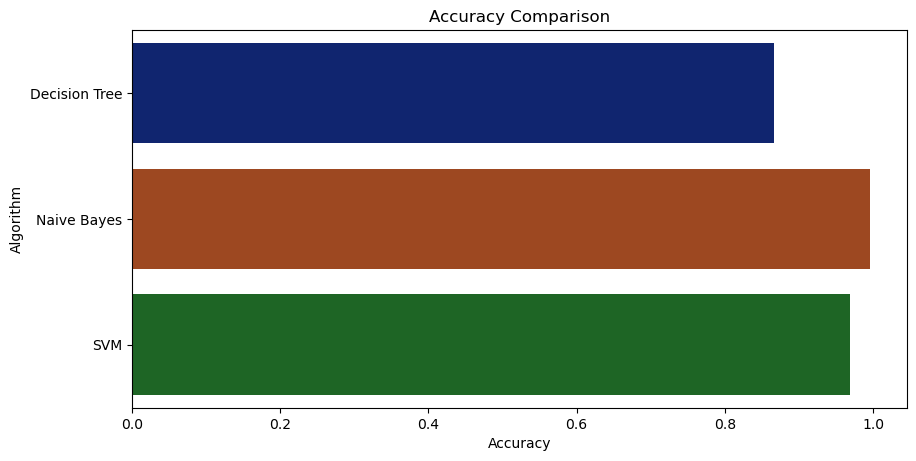

In [57]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [58]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.865909090909091
Naive Bayes --> 0.9954545454545455
SVM --> 0.9681818181818181


In [59]:
from skimage import io


def printData(N,P,K,temperature,humidity,Ph,rainfall):
    plant = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
             'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
             'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
             'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
    
    data = np.array([[N,P,K,temperature,humidity,Ph,rainfall]])
    prediction = NaiveBayes.predict(data)
    
    if prediction in plant:
        for x in plant:
            if x ==prediction:
                break
            
        img = io.imread("photo/"+x+".jpeg")
        io.imshow(img)
        
    print(prediction)
    root.destroy()

    
def get_input():

    N = float(entry1.get())
    P = float(entry2.get())
    K = float(entry3.get())
    temperature = float(entry4.get())
    humidity = float(entry5.get())
    Ph = float(entry6.get())
    rainfall = float(entry7.get())
    
    printData(N,P,K,temperature,humidity,Ph,rainfall)

<h2>Creating Frame using tkinter </h2>

In [60]:
from tkinter import * 

root = Tk()
root.wm_title("Crop recommendation")
root.geometry("300x310")
#Label 1
label1 = Label(root,text = 'N')
label1.pack()
label1.config(justify = CENTER)

entry1 = Entry(root, width = 30)
entry1.pack()

#Label 2
label2 = Label(root,text = 'P')
label2.pack()
label2.config(justify = CENTER)

entry2 = Entry(root, width = 30)
entry2.pack()

#Label 3
label3 = Label(root,text = 'K')
label3.pack()
label3.config(justify = CENTER)

entry3 = Entry(root, width = 30)
entry3.pack()

#Label 4
label4 = Label(root,text = 'Temperature')
label4.pack()
label4.config(justify = CENTER)

entry4 = Entry(root, width = 30)
entry4.pack()


#Label 5
label5 = Label(root,text = 'Humidity')
label5.pack()
label5.config(justify = CENTER)

entry5 = Entry(root, width = 30)
entry5.pack()

#Label 6
label6 = Label(root,text = 'Ph')
label6.pack()
label6.config(justify = CENTER)

entry6 = Entry(root, width = 30)
entry6.pack()

#Label 7
label7 = Label(root,text = 'rainfall')
label7.pack()
label7.config(justify = CENTER)

entry7 = Entry(root, width = 30)
entry7.pack()



button1 = Button(root, text = 'predict')
button1.pack() 
button1.config(command = get_input)
    
    
root.mainloop()